## 딥러닝 한번에 끝내기
### 9. 딥러닝 모델 실습

#### 9-1. 들어가며

![](./img09/01.png)

![](./img09/02.png)

### 과정 개요

Fashion MNIST 모델

패션 데이터를 구분하는 모델을 베이스라인으로 만들고 실습해봅니다.

모델 최적화 여러가지 모델 최적화 방법에대해서 배우고 베이스라인을 기준으로 실습해봅니다.

### 학습 목표

Fashion MNIST 데이터셋을 이용해 딥러닝 모델을 실습합니다.

딥러닝 모델의 다양한 학습 기술과 최적화를 실습합니다.

 이제부터 딥러닝 모델을 사용하여 영상에서 소개한 MNIST 데이터를 학습, 평가하는 과정을 진행하겠습니다.

그 전에 MNIST 데이터를 다시 한 번 알아볼까요? Fashion MNIST는 이미지 분류의 대표적인 데이터셋인 MNIST 손글씨 숫자 인식과 유사하게 패션 이미지로 10개의 종류를 가지는 데이터셋입니다. MNIST 손글씨 숫자 인식보다는 어려운 형태로 구성되어 있습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/on-dlf-9-1-1.max-800x600.png)

### 데이터 로드

Fashion MNIST 데이터셋은 케라스에 내장되어 있으며 fashion_mnist를 임포트하고, load_data()를 호출하여 데이터셋을 로드할 수 있습니다.

학습용 데이터셋에서 30% 정도를 검증용 데이터셋으로 만들기 위해서 train_test_split() 함수를 이용해 분리합니다.

최종적으로 딥러닝 모델에 사용할 학습, 검증, 테스트 데이터의 갯수를 출력해서 확인합니다.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

2023-08-09 11:28:08.332244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


Fashion MNIST 데이터셋에서 사용되는 총 10개의 클래스 이름을 class_names 변수로 지정합니다. 클래스 이름은 Fashion MNIST 깃헙에서 확인하실 수 있습니다.

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

학습 데이터의 레이블 y_train에서 0번째가 무엇인지 출력하면 6이 출력되고, 실제 6이 어떤 클래스인지는 미리 정의한 class_names 리스트에 매칭된 이름으로 Shirt가 출력된 것을 알 수 있습니다.

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


학습 데이터 x_train에서 0번째가 어떻게 구성되어 있는지 출력합니다.

In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

학습 데이터는 이미지라서 0~255의 값을 가지고 있고, 이를 이미지로 imshow()를 이용해 출력합니다. 값의 범위를 보기 위해 colorbar()를 이용해 출력합니다.

/var/folders/jd/qspsq8mn2db0y77ryp1w10_c0000gp/T/ipykernel_12551/835983501.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


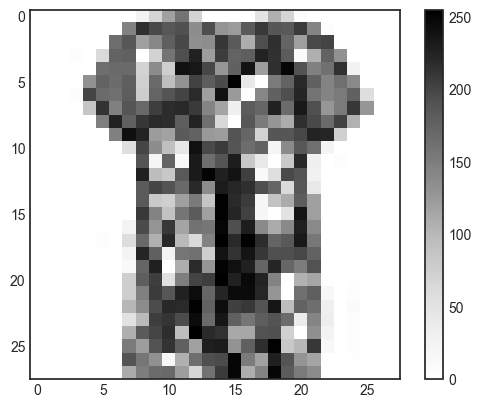

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

Fashion MNIST 데이터셋을 확인하기 위해서 전체 학습 데이터 60,000개 중에서 랜덤으로 4개를 선택하여 인덱스와 레이블, 그리고 해당 패션 이미지를 출력합니다.

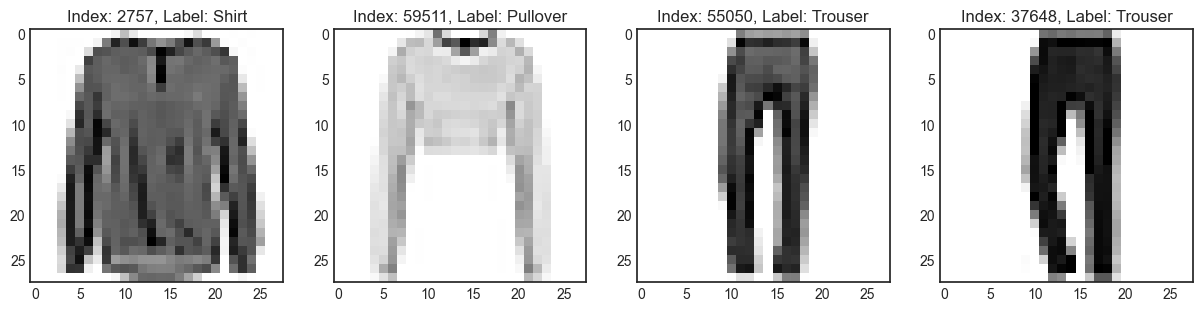

In [6]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

#### 데이터 전처리

딥러닝 모델에서 효과적으로 학습시키기 위해서 입력 데이터를 적절하게 전처리 해주어야 합니다. 기본적으로 데이터셋은 28 x 28 크기의 이미지가 학습 데이터 42,000개, 검증 데이터 18,000개, 테스트 데이터 10,000개로 구성되어 있습니다.

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어줍니다. 여기서 reshape()을 할 때, 훈련 데이터는 (42000, 784), 검증 데이터는 (18000, 784), 테스트 데이터는 (10000, 784)로 지정해도 되지만, 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 하였습니다.

In [8]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


학습 데이터 중에서 0번째 값을 출력해보면, 0부터 255까지의 숫자로 구성되어 있기 때문에 숫자의 범위를 전처리를 통해서 줄여줄 필요가 있습니다.

In [9]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

기존 데이터셋을 255.0으로 나눠주면 아주 간단하게 0 ~ 255 숫자 범위를 0 ~ 1의 범위로 줄일 수 있습니다.

In [10]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

다시 한번 학습 데이터 0번째 값을 출력해보면 0 ~ 1 사이의 숫자로 구성되어 있는 것을 알 수 있습니다.
(아래 코드 블럭은 실행시 스크롤의 압박이 느껴질 수 있어요.😅)

In [11]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

#### 모델 구성

Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용합니다. 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 하고, 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가합니다. 그리고 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가합니다.

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 모델 컴파일 및 학습

모델에 사용할 옵티마이저는 SGD를 사용하고, 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정하며, 지표는 accuracy를 사용합니다.

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Fashion MNIST 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 60으로 지정하며, 배치 사이즈는 512로 지정하고, 검증을 위해서는 검증 데이터로 분리시킨 x_val와 y_val를 지정하여 fit() 함수를 실행시킵니다.

In [14]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 1s 9ms/step - loss: 2.1703 - accuracy: 0.3626 - val_loss: 2.0236 - val_accuracy: 0.5178
Epoch 2/60
83/83 [==============================] - 1s 6ms/step - loss: 1.9034 - accuracy: 0.6127 - val_loss: 1.8040 - val_accuracy: 0.4882
Epoch 3/60
83/83 [==============================] - 1s 6ms/step - loss: 1.7004 - accuracy: 0.6452 - val_loss: 1.6206 - val_accuracy: 0.5764
Epoch 4/60
83/83 [==============================] - 1s 7ms/step - loss: 1.5404 - accuracy: 0.6715 - val_loss: 1.4705 - val_accuracy: 0.6784
Epoch 5/60
83/83 [==============================] - 1s 7ms/step - loss: 1.4132 - accuracy: 0.6912 - val_loss: 1.3610 - val_accuracy: 0.6923
Epoch 6/60
83/83 [==============================] - 1s 6ms/step - loss: 1.3123 - accuracy: 0.7012 - val_loss: 1.2676 - val_accuracy: 0.6924
Epoch 7/60
83/83 [==============================] - 1s 7ms/step - loss: 1.2304 - accuracy: 0.7070 - val_loss: 1.1956 - val_accuracy: 0.6974
Epoch 8/60
83/83 [==

모델의 학습 과정을 저장한 history에 포함되어 있는 loss, val_loss, accuracy, val_accuracy를 차트로 시각화하는 show_history() 함수를 정의합니다.

In [15]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

정의한 show_history() 함수를 이용해 모델 학습 결과인 history를 시각화합니다.

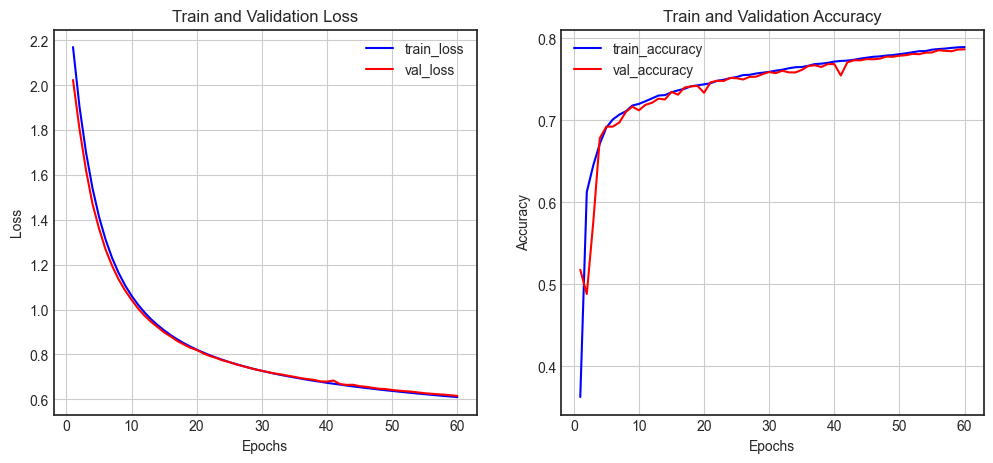

In [16]:
show_history(history)

#### 모델 평가 및 예측

모델이 학습한 결과를 평가하기 위해서는 테스트 데이터셋인 x_test와 y_test를 지정하여 evaluate()를 실행시킵니다. 실행 결과로는 모델이 테스트 데이터셋에서는 어느 정도의 성능이 나오는지 loss와 accuracy 값을 살펴볼 수 있습니다.

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6281 - accuracy: 0.7791


[0.628054678440094, 0.7791000008583069]

학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행시킵니다. 테스트 데이터 셋인 x_test에 대해 모델의 예측 결과인 pred_ys 중에 5번째를 출력해보면, 분류 10개마다 얼만큼의 비율로 예측했는지 알 수 있습니다.

분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장합니다. 그리고 예시로 5번째를 출력해보면 결과로 1이 나오는 것을 알 수 있습니다. 인덱스 1에 해당하는 클래스가 무엇인지 class_names 리스트에서 가져오면 Trouser가 출력되는 것을 알 수 있습니다.

In [18]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 0s 1ms/step
[1.9455884e-02 9.3024492e-01 4.5764749e-03 1.6660782e-02 2.1371365e-02
 4.5464240e-05 7.5010741e-03 3.2406231e-05 9.8546130e-05 1.3004932e-05]
1
Trouser


이미지와 모델이 예측한 결과값을 함께 출력해보면 바지 이미지와 함께 예측한 결과가 출력된 것을 알 수 있습니다.

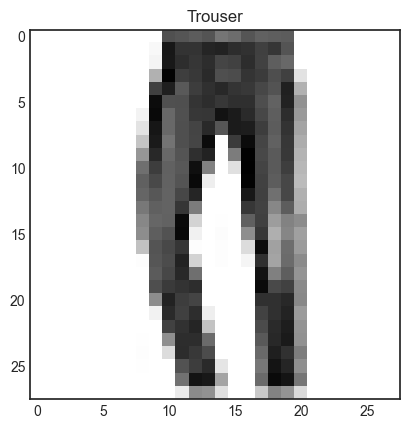

In [19]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의합니다. 모델이 예측한 값인 pred_ys, 테스트 데이터셋의 정답인 y_test, 그리고 이미지 img에 대해서 i 번째를 가져와서 출력을 수행합니다. 여기서 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고, 다르면 red 색을 사용하도록 지정합니다. 이제 예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력합니다.

In [20]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의합니다. 예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화합니다. 기본적으로는 색을 darkgray로 지정하고, 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시합니다.

In [21]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

5번째 데이터에 대해서 정의한 plot_image()와 plot_class() 함수를 호출하여 시각화합니다. 결과를 보면 모델이 Trouser라고 95% 확률로 예측한 것을 알 수 있습니다.

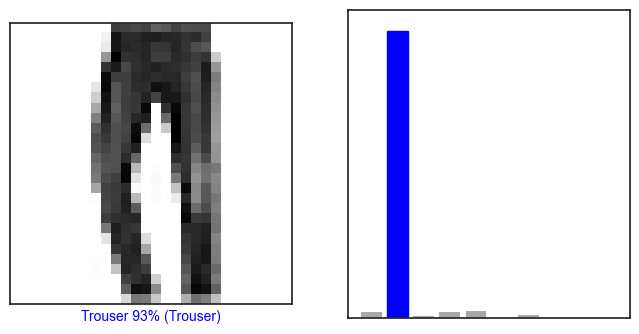

In [22]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

10번째 데이터에 대해서도 마찬가지로 출력을 합니다. 그러나 결과를 보면, 모델은 Pullover로 예측을 했지만, 실제 정답은 Coat인 것으로 알 수 있습니다.

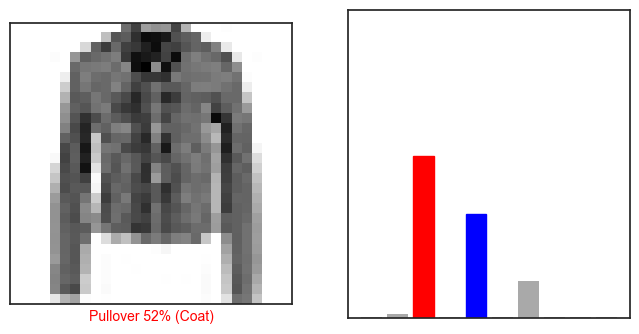

In [23]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

이제 모델 예측 결과 여러 개를 눈으로 확인할 수 있도록 32(8x4)개를 출력하도록 합니다.

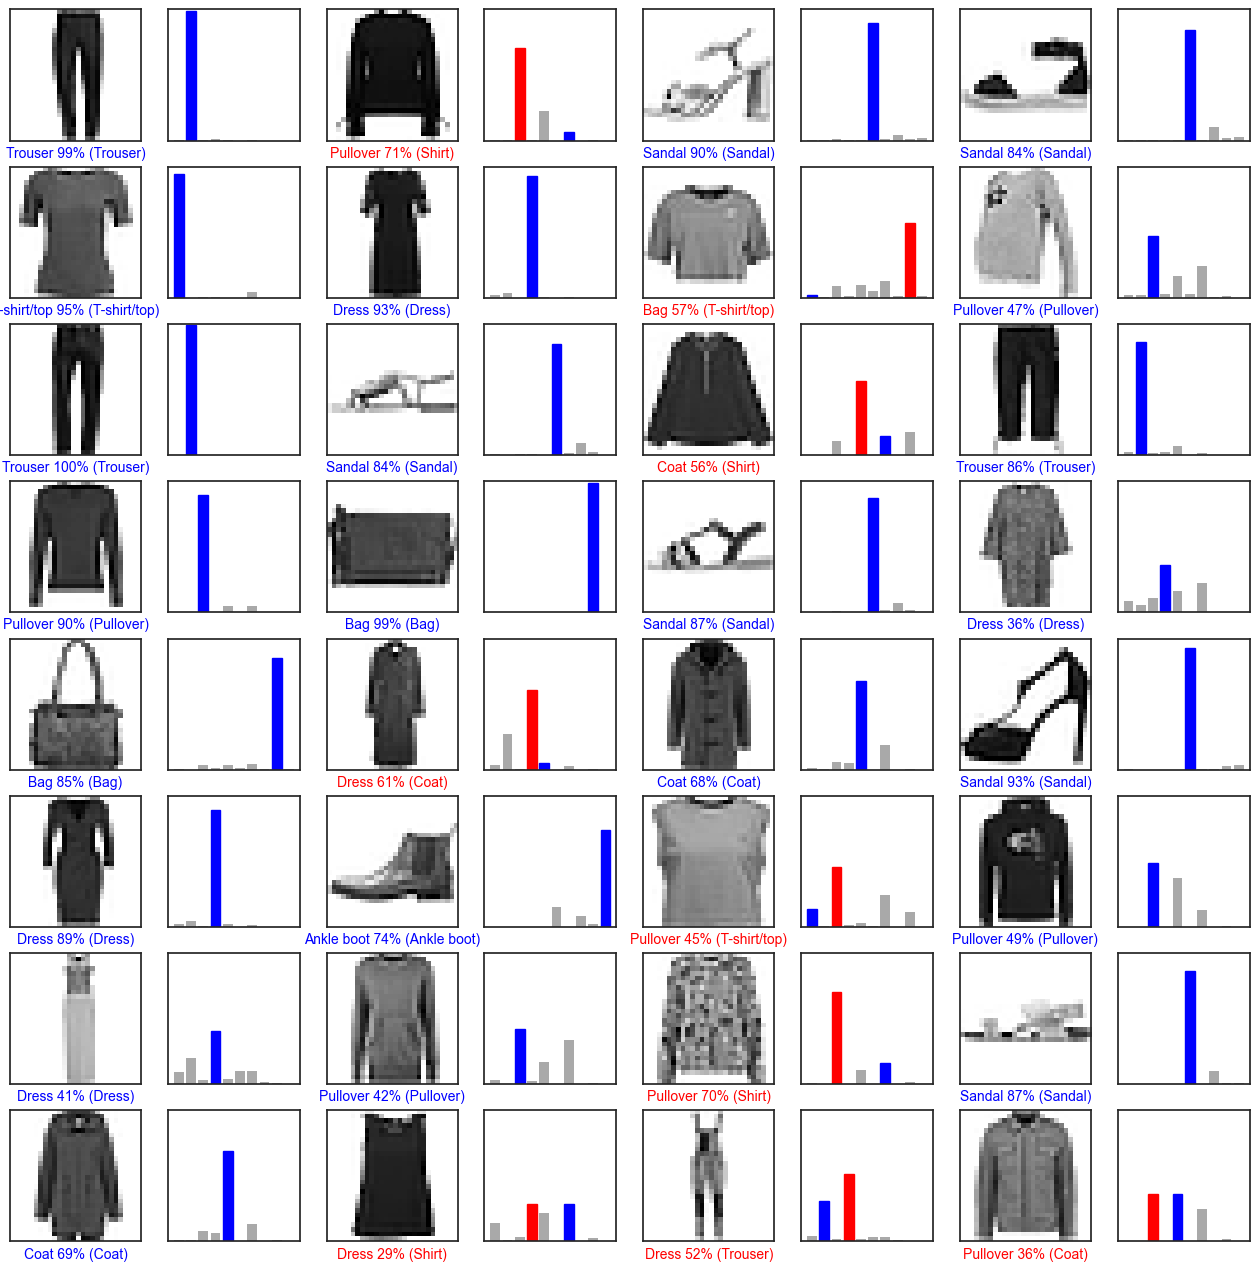

In [24]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

classification_report를 이용하여 Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별로 precision, recall, f1-score, support를 살펴볼 수 있습니다.

In [25]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.80      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.67      0.67      0.67      1000
       Dress       0.76      0.84      0.80      1000
        Coat       0.67      0.69      0.67      1000
      Sandal       0.83      0.84      0.83      1000
       Shirt       0.50      0.38      0.43      1000
     Sneaker       0.84      0.84      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.78     10000
weighted avg       0.77      0.78      0.78     10000



confusion_matrix를 이용해서 예측한 레이블과 실제 레이블과의 일치 여부를 혼동 행렬(confusion matrix)로 시각화할 수 있습니다.

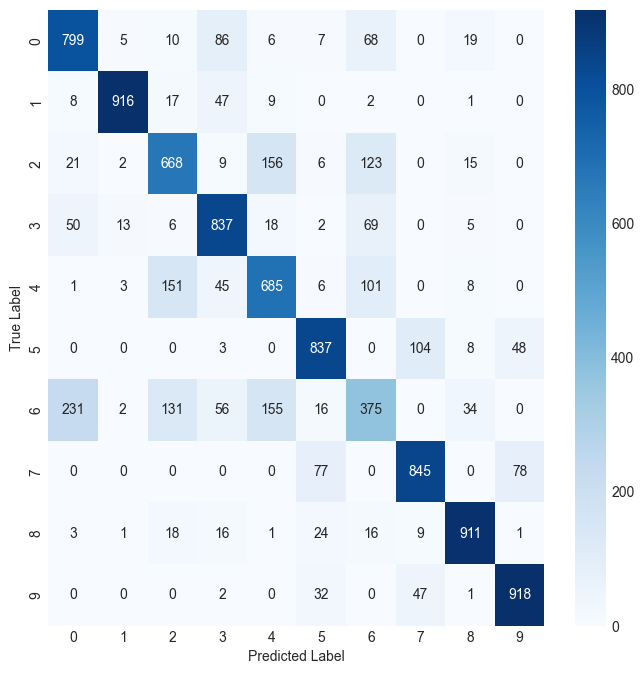

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Q. 모델의 성능을 보았을 때 모델이 어떤 클래스를 구분하기 가장 어려워했나요?

Shirt를 가장 구분하기 어려워했으며 T-shirt/top(164회), Pullover(116회), Coat(124회)으로 많이 착각했습니다.(일부 내용은 다를 수 있습니다.)

![](./img09/03.png)

Fashion MNIST에 모델 성능을 높일 수 있는 최적화 방법을 수행해 봅시다. 최적화 방법은 빠른 학습과 과대 적합을 방지할 수 있죠. 각각의 최적화 방법을 적용한 모델과 적용하지 않은 모델의 결과를 비교하여 차이를 살펴 봅시다.

#### Early Stopping

딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록 콜백 함수로 ModelCheckpoint를 사용해 봅시다. 또한 val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료되도록 EarlyStopping을 사용합니다.

정의한 콜백 함수를 사용하여 fit() 함수를 실행하여 실제 모델 학습을 진행합시다.

In [27]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5959 - accuracy: 0.7925 - val_loss: 0.5900 - val_accuracy: 0.7922
Epoch 2/60
  73/1313 [>.............................] - ETA: 2s - loss: 0.5759 - accuracy: 0.8005

/Users/ralphpark/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 4s 3ms/step - loss: 0.5681 - accuracy: 0.8033 - val_loss: 0.5645 - val_accuracy: 0.8051
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5471 - accuracy: 0.8085 - val_loss: 0.5476 - val_accuracy: 0.8103
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5309 - accuracy: 0.8144 - val_loss: 0.5331 - val_accuracy: 0.8131
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5175 - accuracy: 0.8199 - val_loss: 0.5243 - val_accuracy: 0.8174
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5062 - accuracy: 0.8224 - val_loss: 0.5174 - val_accuracy: 0.8173
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4969 - accuracy: 0.8253 - val_loss: 0.5026 - val_accuracy: 0.8269
Epoch 8/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4888 - accuracy: 0.8287 - val_loss: 0.4964 - val_accuracy: 0.8287
Epo

모델의 학습 히스토리를 시각화합니다.

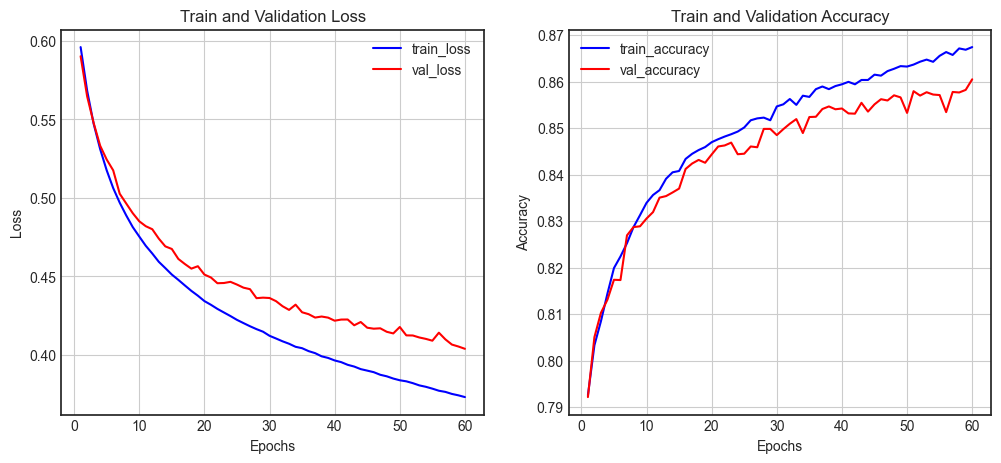

In [28]:
show_history(history)

모델의 평가 결과도 테스트 데이터셋을 이용해 확인합니다.

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8443


[0.42488184571266174, 0.8442999720573425]

#### 활성화 함수

기존 모델에서는 활성화 함수로 선형 함수인 sigmoid를 사용하였는데, 비선형 함수인 relu로 변경하여 학습이 어떻게 진행되는지 살펴봅니다.
아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [32]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7702 - accuracy: 0.7572 - val_loss: 0.5804 - val_accuracy: 0.8081
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5286 - accuracy: 0.8227 - val_loss: 0.5116 - val_accuracy: 0.8277
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4784 - accuracy: 0.8360 - val_loss: 0.4837 - val_accuracy: 0.8367
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4519 - accuracy: 0.8445 - val_loss: 0.4502 - val_accuracy: 0.8467
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4320 - accuracy: 0.8497 - val_loss: 0.4374 - val_accuracy: 0.8525
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4172 - accuracy: 0.8555 - val_loss: 0.4303 - val_accuracy: 0.8544
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4054 - accuracy: 0.8598 - val_loss: 0.4199 - val_accuracy:

두 개의 모델 학습 히스토리를 차트로 비교할 수 있도록 시각화하는 diff_history() 함수를 정의합니다.

In [34]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

기존 모델과 활성화 함수를 relu로 변경한 모델의 학습 결과를 시각화합니다.

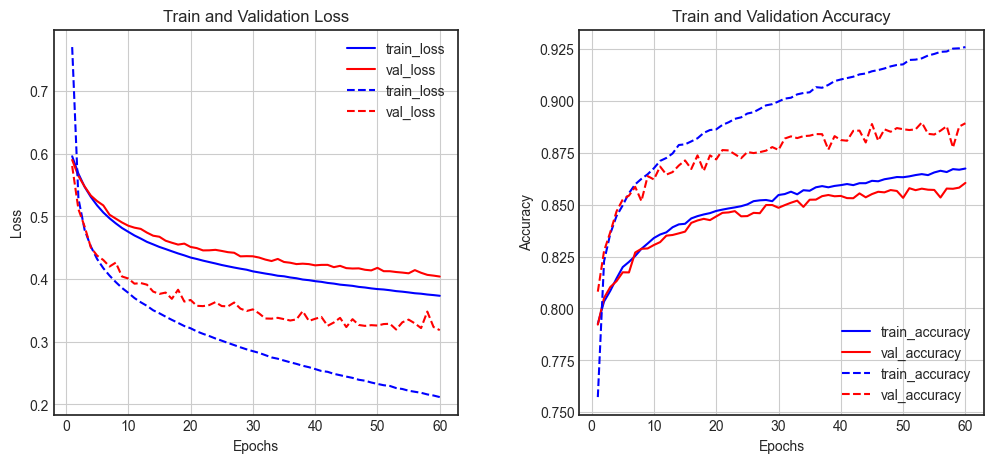

In [35]:
diff_history(history, history2)

활성화 함수를 변경한 모델의 평가 결과를 확인합니다.

In [36]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8789


[0.3403025269508362, 0.8788999915122986]

#### 옵티마이저

기존 모델에서는 옵티마이저로 SGD를 사용했는데, 좀 더 빠르고 효과적인 학습이 가능하도록 Adam으로 변경합니다.
아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [37]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [38]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 9s 6ms/step - loss: 0.3824 - accuracy: 0.8644 - val_loss: 0.3964 - val_accuracy: 0.8640
Epoch 2/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3306 - accuracy: 0.8778 - val_loss: 0.3686 - val_accuracy: 0.8726
Epoch 3/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3039 - accuracy: 0.8894 - val_loss: 0.3489 - val_accuracy: 0.8767
Epoch 4/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2924 - accuracy: 0.8910 - val_loss: 0.3603 - val_accuracy: 0.8792
Epoch 5/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2728 - accuracy: 0.8986 - val_loss: 0.3472 - val_accuracy: 0.8826
Epoch 6/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2601 - accuracy: 0.9035 - val_loss: 0.3323 - val_accuracy: 0.8892
Epoch 7/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2533 - accuracy: 0.9047 - val_loss: 0.3384 - val_accuracy:

기존 모델 학습 결과와 옵티마이저를 바꾼 모델의 학습 결과를 살펴보면, 학습이 빠르게 진행되어 조기에 종료되는 것을 알 수 있습니다. 다만, 과대적합이 발생하는 것을 알 수 있습니다.

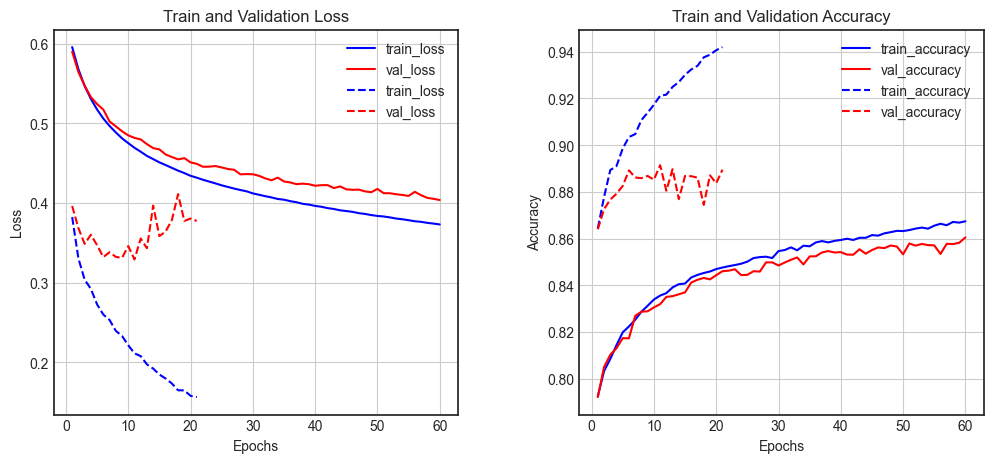

In [39]:
diff_history(history, history3)

옵티마이저를 변경한 모델의 평가 결과를 확인합니다.

In [40]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8805


[0.35586604475975037, 0.8805000185966492]

#### 규제

모델에서 과대적합이 발생하는 부분을 규제하기 위해서 중간의 Dense 레이어에 L2 규제 방법을 적용합니다.
아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [47]:
from keras import models, layers, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])



Epoch 1/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.7758 - accuracy: 0.8117 - val_loss: 0.5913 - val_accuracy: 0.8381
Epoch 2/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5630 - accuracy: 0.8389 - val_loss: 0.5239 - val_accuracy: 0.8489
Epoch 3/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5166 - accuracy: 0.8494 - val_loss: 0.5093 - val_accuracy: 0.8545
Epoch 4/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4958 - accuracy: 0.8540 - val_loss: 0.5184 - val_accuracy: 0.8458
Epoch 5/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4726 - accuracy: 0.8603 - val_loss: 0.4924 - val_accuracy: 0.8538
Epoch 6/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4638 - accuracy: 0.8626 - val_loss: 0.4768 - val_accuracy: 0.8587
Epoch 7/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4544 - accuracy: 0.8651 - val_loss: 0.4661 - val_accuracy:

기존 모델 학습 결과와 L2 규제 방법을 적용한 모델의 학습 결과를 살펴보면, 성능은 일부 저하되지만 어느정도 과대적합을 억제하는 것을 알 수 있습니다.

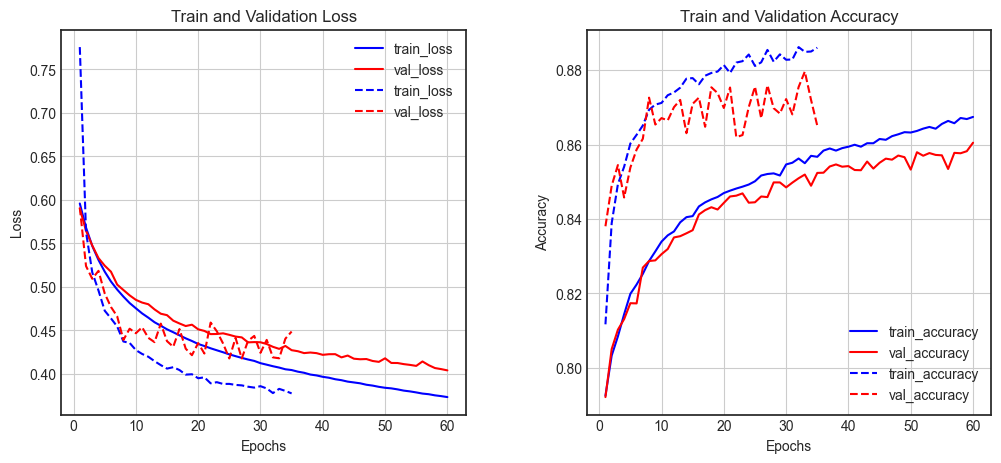

In [49]:
diff_history(history, history4)

L2 규제 방법을 적용한 모델의 평가 결과를 확인합니다.

In [50]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4427 - accuracy: 0.8655


[0.4427463412284851, 0.8654999732971191]

#### 드롭아웃

모델에서 성능 저하를 최소화하면서 과대적합을 억제하기 위한 방법으로 Dense 레이어 사이에 50%의 Dropout 레이어를 적용합니다.
아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [51]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.5834 - accuracy: 0.7913 - val_loss: 0.4294 - val_accuracy: 0.8460
Epoch 2/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.4522 - accuracy: 0.8344 - val_loss: 0.3798 - val_accuracy: 0.8649
Epoch 3/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.4175 - accuracy: 0.8470 - val_loss: 0.3885 - val_accuracy: 0.8572
Epoch 4/60
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3917 - accuracy: 0.8573 - val_loss: 0.3825 - val_accuracy: 0.8577
Epoch 5/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3790 - accuracy: 0.8612 - val_loss: 0.3629 - val_accuracy: 0.8722
Epoch 6/60
1313/1313 [==============================] - 11s 8ms/step - loss: 0.3689 - accuracy: 0.8648 - val_loss: 0.3518 - val_accuracy: 0.8748
Epoch 7/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3589 - accuracy: 0.8673 - val_loss: 0.3400 - val_ac

기존 모델 학습 결과와 드롭아웃을 적용한 방법의 학습 결과를 살펴보면, 과대적합을 잘 방지하고 있는 결과를 보여주고 있습니다.

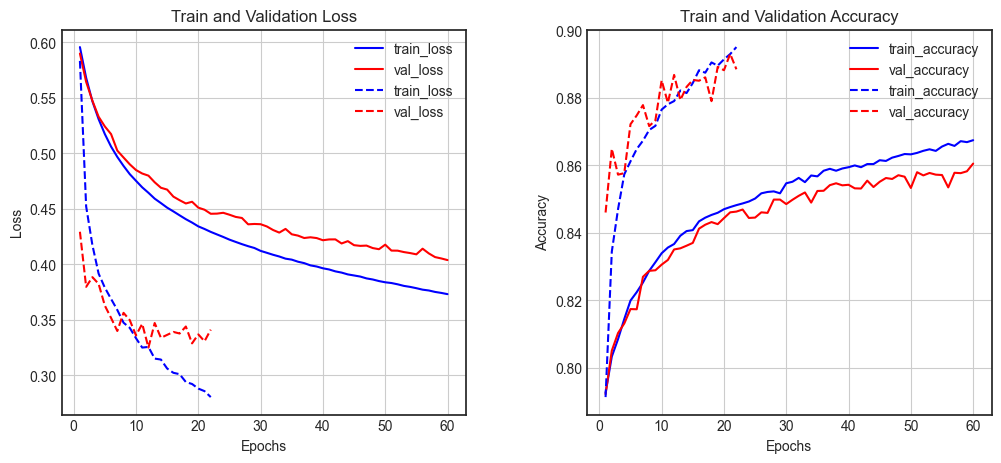

In [53]:
diff_history(history, history5)

규제 방법 중에 L2 규제보다는 드롭아웃 방법이 더 좋은 결과를 보여주는 것을 알 수 있습니다.

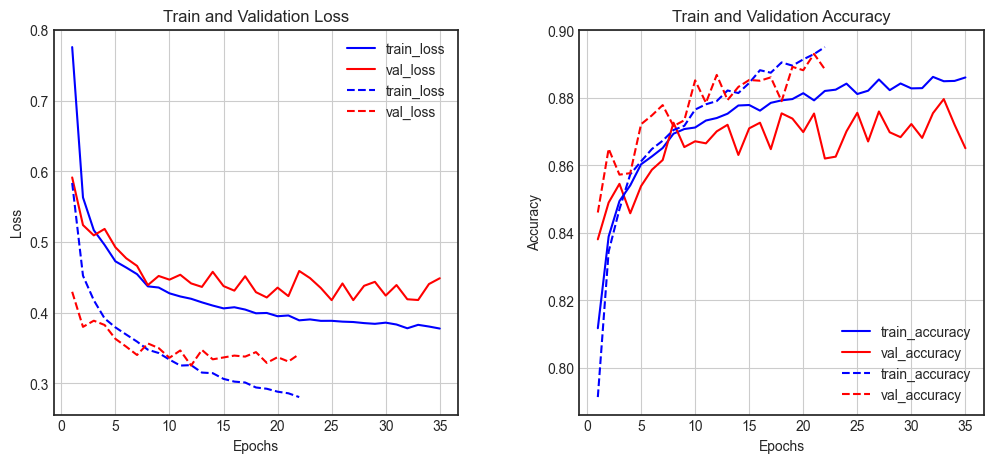

In [54]:
diff_history(history4, history5)

드롭아웃 방법을 적용한 모델의 평가 결과를 확인합니다.

In [55]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.8783


[0.34717243909835815, 0.8783000111579895]

#### 배치 정규화
빠르고 효과적인 학습을 도와주는 배치 정규화도 적용해보기 위해 Dense 레이어 다음에 BatchNormalization 레이어를 추가하고, 이후 활성화 함수 Activation 레이어를 추가합니다.
아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [57]:
from keras import models, layers

from keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
_________________________________________________________________


In [58]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 17s 12ms/step - loss: 0.4735 - accuracy: 0.8296 - val_loss: 0.4298 - val_accuracy: 0.8471
Epoch 2/60
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3679 - accuracy: 0.8651 - val_loss: 0.5479 - val_accuracy: 0.8274
Epoch 3/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.3336 - accuracy: 0.8771 - val_loss: 0.3898 - val_accuracy: 0.8653
Epoch 4/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3040 - accuracy: 0.8884 - val_loss: 0.3464 - val_accuracy: 0.8761
Epoch 5/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.2807 - accuracy: 0.8964 - val_loss: 0.3453 - val_accuracy: 0.8806
Epoch 6/60
1313/1313 [==============================] - 15s 11ms/step - loss: 0.2638 - accuracy: 0.9006 - val_loss: 0.4072 - val_accuracy: 0.8601
Epoch 7/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.2480 - accuracy: 0.9070 - val_loss: 0.3759 -

기존 모델 결과와 배치 정규화를 적용한 모델의 학습 결과를 살펴보면, 학습도 빠르게 진행되는 결과를 보여주고 있습니다.

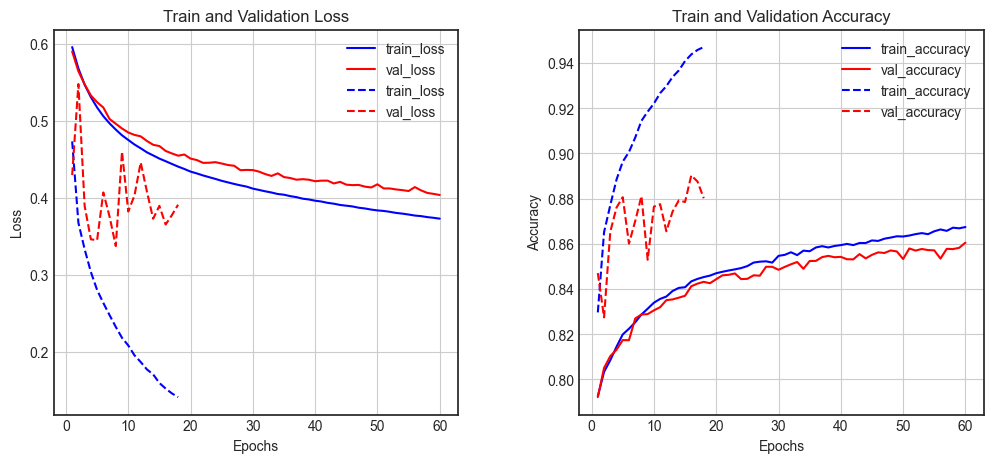

In [59]:
diff_history(history, history6)

배치 정규화 방법을 적용한 모델의 평가 결과를 확인합니다.

In [60]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3619 - accuracy: 0.8737


[0.3618806004524231, 0.8737000226974487]

#### 배치 정규화 + 드롭아웃

배치 정규화를 통해 안정적인 학습이 가능하지만, 규제 방법 중 좋은 성능을 보였던 드롭아웃을 함께 적용해보도록 하겠습니다. 기존 배치 정규화를 적용한 모델에 Activation 레이어 이후에 Dropout 레이어를 추가해주면 됩니다.

In [61]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 409098 (1.56 MB)
Trainable params: 408074 (1.56 MB)
Non-trainable params: 1024 (4.00 KB)
________________

In [62]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.5610 - accuracy: 0.8023 - val_loss: 0.4040 - val_accuracy: 0.8524
Epoch 2/60
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4402 - accuracy: 0.8416 - val_loss: 0.4433 - val_accuracy: 0.8417
Epoch 3/60
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4051 - accuracy: 0.8537 - val_loss: 0.3830 - val_accuracy: 0.8626
Epoch 4/60
1313/1313 [==============================] - 15s 12ms/step - loss: 0.3817 - accuracy: 0.8612 - val_loss: 0.4239 - val_accuracy: 0.8437
Epoch 5/60
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3673 - accuracy: 0.8658 - val_loss: 0.3751 - val_accuracy: 0.8617
Epoch 6/60
1313/1313 [==============================] - 15s 12ms/step - loss: 0.3572 - accuracy: 0.8689 - val_loss: 0.3683 - val_accuracy: 0.8668
Epoch 7/60
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3430 - accuracy: 0.8744 - val_loss: 0.3487 -

배치 정규화와 드롭아웃을 둘다 적용하였기 때문에 안정적인 학습과 더불어 과대적합도 줄여주는 결과를 볼 수 있습니다.

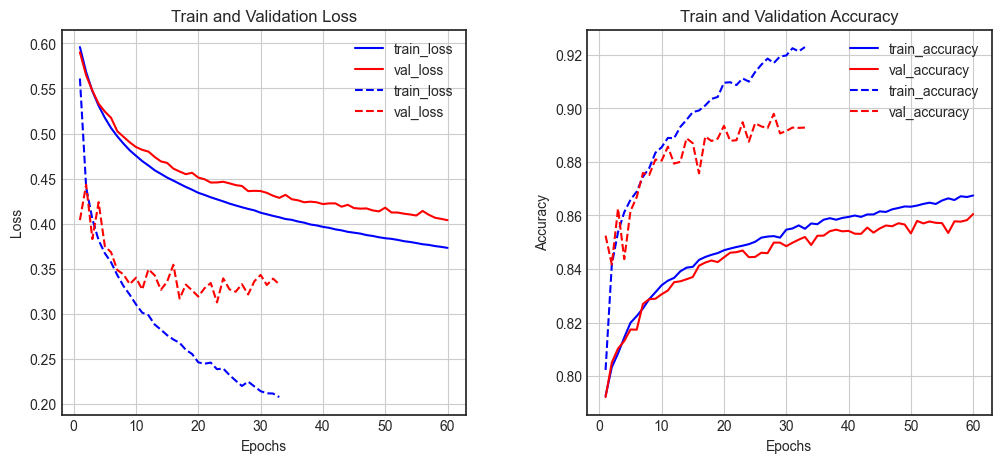

In [63]:
diff_history(history, history7)

배치 정규화와 드롭아웃을 둘 다 적용한 모델의 평가 결과를 살펴봅니다.

In [64]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8865


[0.3386135697364807, 0.8865000009536743]

모델 결과 분석
랜덤으로 데이터를 선별하여 최종적으로 최적화를 수행한 모델이 분류한 결과를 시각화합니다.
모델의 결과를 혼동 행렬를 통해서 시각화합니다.

313/313 [==============================] - 0s 1ms/step


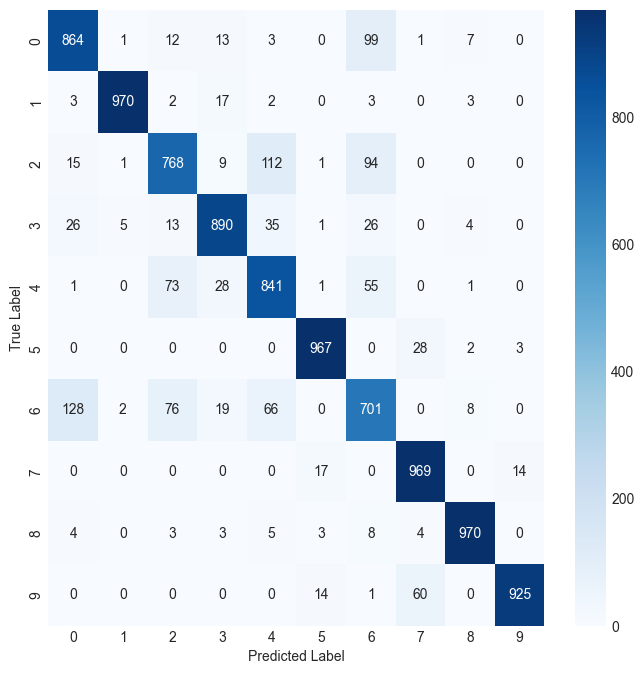

In [65]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

pred_ys = model.predict(x_test)
arg_pred_y = np.argmax(pred_ys, axis=1)

y_test_cat = utils.to_categorical(y_test)

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Fashion MNIST를 분류하는 딥러닝 모델이 최적화를 통해서 기본 모델 보다 상당히 높은 성능을 보여주는 것을 알 수 있습니다. 그러나 최적화를 수행하여도 모델 평가 결과는 90%를 넘기기 어렵습니다.

딥러닝 모델에서 구조적으로 이미지를 입력으로 사용할 때 적합한 CNN(Convolution Neural Network) 계열의 아키텍처가 있고, 텍스트를 입력으로 사용할 때 적합한 RNN(Recurrent Neural Network) 계열의 아키텍처가 있습니다. 즉, 기본적인 신경망 구조가 아닌 입력되는 데이터의 특성을 고려한 아키텍처가 필요합니다. 이러한 아키텍처와 모델들은 컴퓨터비전과 자연어처리 과정을 통해서 학습하실 수 있습니다.


![](./img09/04.png)
### 이번 시간 정리

이번 시간에는 딥러닝 모델을 학습하고 최적화하기 위한 다양한 기술을 이해하고, 딥러닝 모델의 활성화 함수, 옵티마이저, 규제, 드롭아웃, 배치정규화에 대해 살펴봤습니다. 또한 그동안 배웠던 기술을 새로운 데이터셋에 직접 적용해 보았습니다. 다양한 실험을 통해 더 높은 성능의 모델을 만들어 보세요.

### 종합 문제

이번 노드는 어떠셨나요?

실습을 통해서 내용에 대해서 충분히 숙지하실 수 있었나요?

그럼 오늘 배운 내용을 돌이켜보며 아래 종합 문제를 확인해봅시다.

Q. 모델의 성능을 높이기 위해 여러분이 시도한 것 혹은 시도해볼 만한 것을 적어주세요.

L2 규제를 통해 가중치 업데이트를 제한하고 옵티마이저로는 RMSprop 계열과 Adagrad 계열의 장점을 차용한 Adam을 사용하였다. 종전 모델의 구조에 드롭아웃 레이어와 배치정규화 레이어를 집어넣어 보았습니다.

모델의 성능을 높이기 위해 시도해볼 수 있는 몇 가지 방법은 다음과 같습니다:

1. 데이터 전처리: 데이터를 정규화하거나 표준화하여 입력 특성의 범위를 조절하거나, 이상치를 제거하거나, 데이터를 보간하여 누락된 값을 채우는 등의 기법을 사용합니다.

2. 데이터 증강: 더 많은 데이터를 생성하여 모델을 학습시키는 방법입니다. 이미지 데이터의 경우 회전, 반전, 확대/축소, 왜곡 등의 변환을 적용할 수 있습니다.

3. 모델 복잡도 조절: 네트워크 구조를 변경하여 모델의 크기를 증가시키거나 감소시킬 수 있습니다. 더 많은 레이어를 추가하거나, 레이어당 노드 수를 늘리거나 줄일 수 있습니다.

4. 규제 추가: 오버피팅을 방지하고 일반화 성능을 높이기 위해 L1 규제, L2 규제, 드롭아웃 등의 규제 기법을 사용합니다.

5. 배치 정규화: 각 학습 배치에 대한 입력 분포를 정규화하여 학습 속도를 높이고, 학습 안정성을 개선합니다.

6. 초매개변수(Hyperparameter) 최적화: 학습률(learning rate), 가중치 감소(weight decay), 최적화 알고리즘(optimizer), 배치 크기(batch size) 등의 초매개변수를 조정하며 모델 성능을 최적화합니다.

7. 활성화 함수 변경: 다양한 활성화 함수를 실험해보며 모델 성능에 어떤 영향을 미치는지 확인합니다. ReLU, Leaky ReLU, ELU, SELU 등 다양한 활성화 함수를 사용해볼 수 있습니다.

8. 기울기 소실/폭주 문제 해결: 네트워크 초기화 방법(Xavier 초기화, He 초기화 등), 배치 정규화, 사용하는 활성화 함수의 변경, 짧은 연결(ResNet에서 착안한 Skip Connection) 등으로 해결할 수 있습니다.

9. 앙상블 기법: 여러 개의 모델을 결합하여 전체 성능을 향상시키는 방법입니다. 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등의 앙상블 기법을 적용해볼 수 있습니다.

10. 전이 학습(Transfer Learning): 이미 훈련된 모델의 일부를 가져와서 새로운 모델에 적용하고, 해당 데이터셋에 맞게 미세 조정(Fine-tuning)합니다. 이 방법은 특히 데이터가 제한적인 경우에 유용합니다.

성능 향상을 위한 창의적인 기법과 접근 방식은 다양하며, 문제에 따라 적합한 방법을 선택하고 적용해야 합니다. 더 나아가 최근의 연구 동향과 새로운 기술에 주의를 기울이며 적용해보면 성능을 더욱 높일 수 있습니다.